In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [128]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

In [129]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [215]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [281]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [282]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [283]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.2, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [284]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(8, 512, 512, 3) (8, 512, 512, 1)
0 1
[0 1]


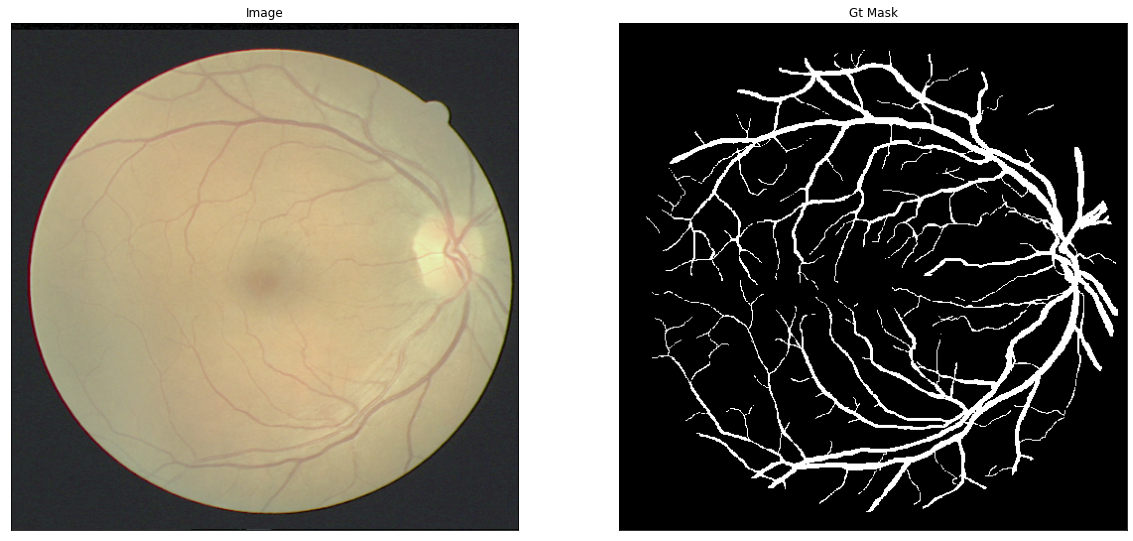

0 1
[0 1]


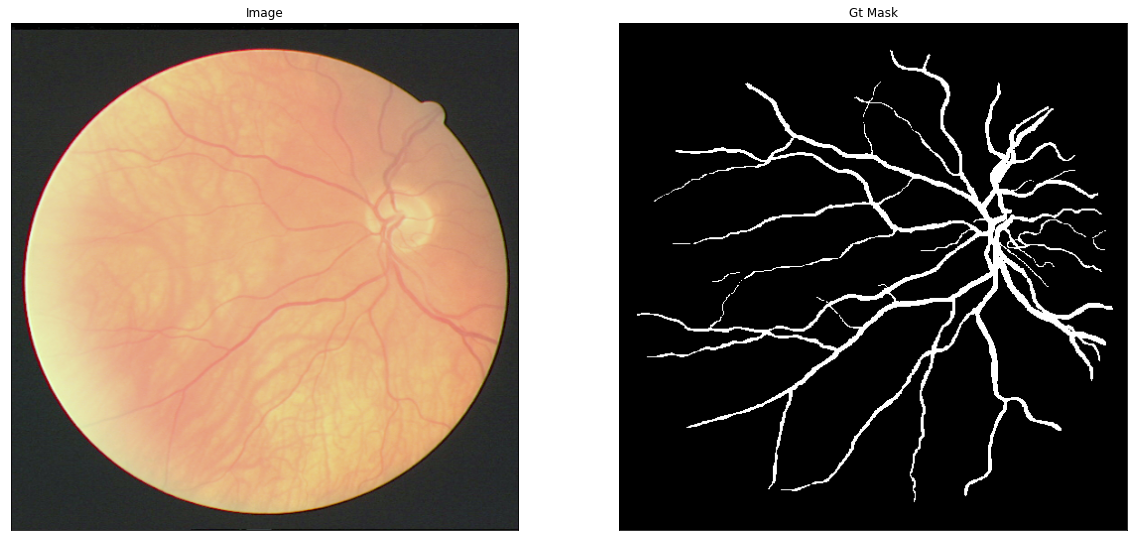

In [285]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [286]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model9 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model9.summary(line_length=110)

Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, None, None, 64)  0            block1_conv2[0][0]      

# Callback : Monitoring Training Progress

In [287]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model9.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [288]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [289]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model9.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
12/12 [==============================] - 9s 590ms/step - loss: 0.9094 - dice_coefficient: 0.1869 - accuracy: 0.5285 - val_loss: 7.6054 - val_dice_coefficient: 0.1615 - val_accuracy: 0.0891

Epoch 00001: val_loss improved from inf to 7.60536, saving model to /kaggle/Models/model9.h5
Epoch 2/250
12/12 [==============================] - 7s 559ms/step - loss: 0.7342 - dice_coefficient: 0.2197 - accuracy: 0.6617 - val_loss: 2.4179 - val_dice_coefficient: 0.1699 - val_accuracy: 0.1088

Epoch 00002: val_loss improved from 7.60536 to 2.41788, saving model to /kaggle/Models/model9.h5
Epoch 3/250
12/12 [==============================] - 7s 557ms/step - loss: 0.6384 - dice_coefficient: 0.2370 - accuracy: 0.7415 - val_loss: 0.9065 - val_dice_coefficient: 0.1974 - val_accuracy: 0.2232

Epoch 00003: val_loss improved from 2.41788 to 0.90646, saving model to /kaggle/Models/model9.h5
Epoch 4/250
12/12 [==============================] - 7s 560ms/step - loss: 0.5739 - dice_coefficient: 0.248

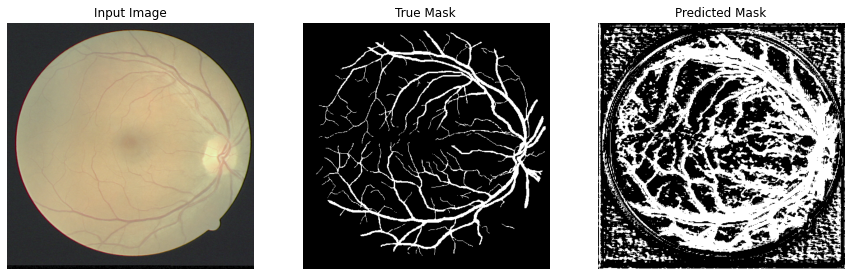


Sample Prediction after epoch 6

Epoch 7/250
12/12 [==============================] - 7s 556ms/step - loss: 0.4635 - dice_coefficient: 0.2720 - accuracy: 0.9035 - val_loss: 0.6790 - val_dice_coefficient: 0.2499 - val_accuracy: 0.6819

Epoch 00007: val_loss improved from 0.68590 to 0.67900, saving model to /kaggle/Models/model9.h5
Epoch 8/250
12/12 [==============================] - 7s 562ms/step - loss: 0.4394 - dice_coefficient: 0.2786 - accuracy: 0.9180 - val_loss: 0.5696 - val_dice_coefficient: 0.2459 - val_accuracy: 0.8719

Epoch 00008: val_loss improved from 0.67900 to 0.56962, saving model to /kaggle/Models/model9.h5
Epoch 9/250
12/12 [==============================] - 7s 559ms/step - loss: 0.4201 - dice_coefficient: 0.2845 - accuracy: 0.9272 - val_loss: 0.6462 - val_dice_coefficient: 0.2345 - val_accuracy: 0.7648

Epoch 00009: val_loss did not improve from 0.56962
Epoch 10/250
12/12 [==============================] - 7s 558ms/step - loss: 0.4047 - dice_coefficient: 0.2887 - acc

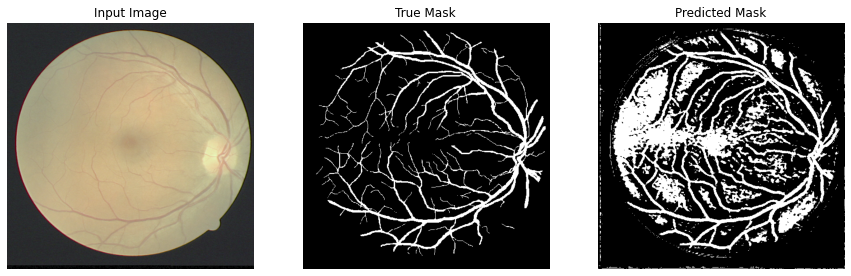


Sample Prediction after epoch 11

Epoch 12/250
12/12 [==============================] - 7s 559ms/step - loss: 0.3782 - dice_coefficient: 0.2975 - accuracy: 0.9402 - val_loss: 0.5137 - val_dice_coefficient: 0.2456 - val_accuracy: 0.9134

Epoch 00012: val_loss improved from 0.52793 to 0.51373, saving model to /kaggle/Models/model9.h5
Epoch 13/250
12/12 [==============================] - 7s 561ms/step - loss: 0.3632 - dice_coefficient: 0.3040 - accuracy: 0.9449 - val_loss: 0.4371 - val_dice_coefficient: 0.2536 - val_accuracy: 0.9460

Epoch 00013: val_loss improved from 0.51373 to 0.43712, saving model to /kaggle/Models/model9.h5
Epoch 14/250
12/12 [==============================] - 7s 562ms/step - loss: 0.3495 - dice_coefficient: 0.3111 - accuracy: 0.9475 - val_loss: 0.4349 - val_dice_coefficient: 0.2678 - val_accuracy: 0.9314

Epoch 00014: val_loss improved from 0.43712 to 0.43486, saving model to /kaggle/Models/model9.h5
Epoch 15/250
12/12 [==============================] - 7s 559ms/st

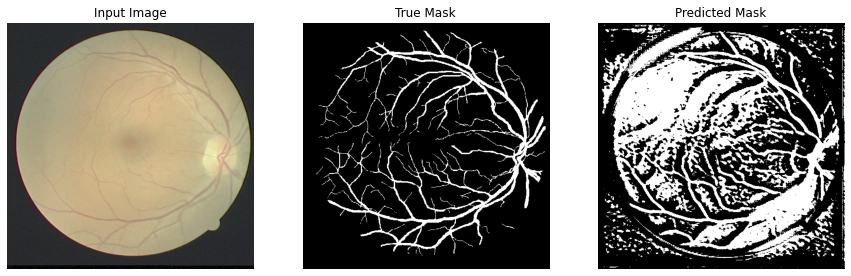


Sample Prediction after epoch 16

Epoch 17/250
12/12 [==============================] - 7s 559ms/step - loss: 0.3454 - dice_coefficient: 0.3081 - accuracy: 0.9394 - val_loss: 2.0968 - val_dice_coefficient: 0.1883 - val_accuracy: 0.2220

Epoch 00017: val_loss did not improve from 0.43486
Epoch 18/250
12/12 [==============================] - 7s 562ms/step - loss: 0.3272 - dice_coefficient: 0.3176 - accuracy: 0.9450 - val_loss: 1.8971 - val_dice_coefficient: 0.1909 - val_accuracy: 0.2338

Epoch 00018: val_loss did not improve from 0.43486
Epoch 19/250
12/12 [==============================] - 7s 561ms/step - loss: 0.3136 - dice_coefficient: 0.3255 - accuracy: 0.9483 - val_loss: 0.9774 - val_dice_coefficient: 0.2184 - val_accuracy: 0.3226

Epoch 00019: val_loss did not improve from 0.43486
Epoch 20/250
12/12 [==============================] - 7s 560ms/step - loss: 0.3023 - dice_coefficient: 0.3327 - accuracy: 0.9506 - val_loss: 0.7820 - val_dice_coefficient: 0.2323 - val_accuracy: 0.4703



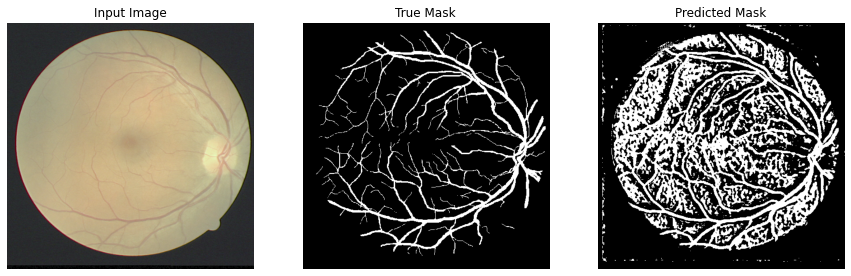


Sample Prediction after epoch 21

Epoch 22/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2846 - dice_coefficient: 0.3457 - accuracy: 0.9530 - val_loss: 0.4773 - val_dice_coefficient: 0.2736 - val_accuracy: 0.8721

Epoch 00022: val_loss did not improve from 0.43486
Epoch 23/250
12/12 [==============================] - 7s 563ms/step - loss: 0.2765 - dice_coefficient: 0.3531 - accuracy: 0.9539 - val_loss: 0.4583 - val_dice_coefficient: 0.2730 - val_accuracy: 0.8789

Epoch 00023: val_loss did not improve from 0.43486
Epoch 24/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2687 - dice_coefficient: 0.3580 - accuracy: 0.9550 - val_loss: 0.3646 - val_dice_coefficient: 0.3036 - val_accuracy: 0.9376

Epoch 00024: val_loss improved from 0.43486 to 0.36461, saving model to /kaggle/Models/model9.h5
Epoch 25/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2620 - dice_coefficient: 0.3645 - accuracy: 0.9552 - val_loss: 0.3474 - val_dic

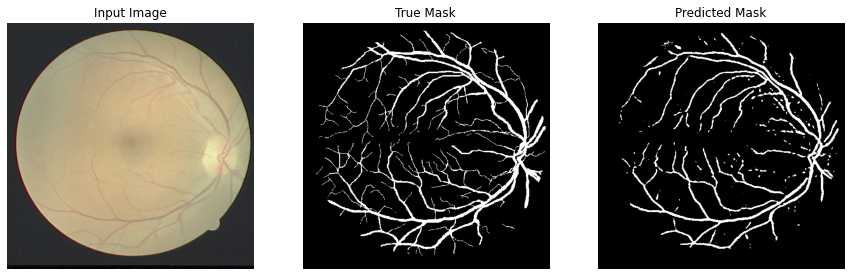


Sample Prediction after epoch 26

Epoch 27/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2594 - dice_coefficient: 0.3644 - accuracy: 0.9515 - val_loss: 0.2489 - val_dice_coefficient: 0.3107 - val_accuracy: 0.9429

Epoch 00027: val_loss improved from 0.28760 to 0.24894, saving model to /kaggle/Models/model9.h5
Epoch 28/250
12/12 [==============================] - 7s 559ms/step - loss: 0.2506 - dice_coefficient: 0.3708 - accuracy: 0.9530 - val_loss: 0.2190 - val_dice_coefficient: 0.3378 - val_accuracy: 0.9466

Epoch 00028: val_loss improved from 0.24894 to 0.21900, saving model to /kaggle/Models/model9.h5
Epoch 29/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2412 - dice_coefficient: 0.3790 - accuracy: 0.9545 - val_loss: 0.2428 - val_dice_coefficient: 0.3605 - val_accuracy: 0.9549

Epoch 00029: val_loss did not improve from 0.21900
Epoch 30/250
12/12 [==============================] - 7s 564ms/step - loss: 0.2332 - dice_coefficient: 0.3875 -

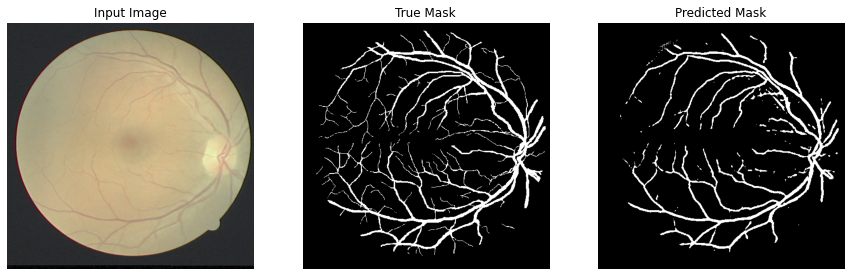


Sample Prediction after epoch 31

Epoch 32/250
12/12 [==============================] - 7s 556ms/step - loss: 0.2200 - dice_coefficient: 0.4027 - accuracy: 0.9574 - val_loss: 0.2160 - val_dice_coefficient: 0.3784 - val_accuracy: 0.9567

Epoch 00032: val_loss improved from 0.21900 to 0.21601, saving model to /kaggle/Models/model9.h5
Epoch 33/250
12/12 [==============================] - 7s 560ms/step - loss: 0.2144 - dice_coefficient: 0.4095 - accuracy: 0.9579 - val_loss: 0.2133 - val_dice_coefficient: 0.3938 - val_accuracy: 0.9573

Epoch 00033: val_loss improved from 0.21601 to 0.21329, saving model to /kaggle/Models/model9.h5
Epoch 34/250
12/12 [==============================] - 7s 561ms/step - loss: 0.2092 - dice_coefficient: 0.4150 - accuracy: 0.9584 - val_loss: 0.2128 - val_dice_coefficient: 0.3867 - val_accuracy: 0.9578

Epoch 00034: val_loss improved from 0.21329 to 0.21279, saving model to /kaggle/Models/model9.h5
Epoch 35/250
12/12 [==============================] - 7s 559ms/st

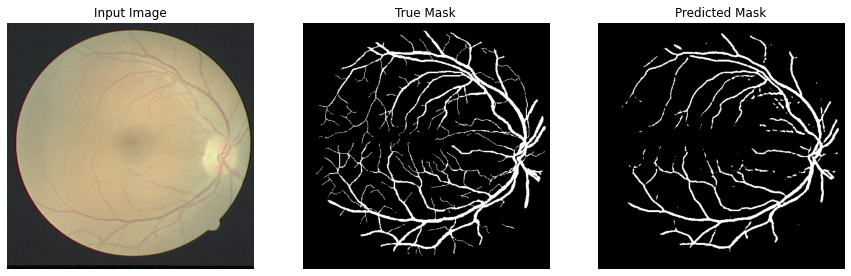


Sample Prediction after epoch 36

Epoch 37/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1949 - dice_coefficient: 0.4341 - accuracy: 0.9597 - val_loss: 0.2064 - val_dice_coefficient: 0.3874 - val_accuracy: 0.9580

Epoch 00037: val_loss improved from 0.20881 to 0.20636, saving model to /kaggle/Models/model9.h5
Epoch 38/250
12/12 [==============================] - 7s 558ms/step - loss: 0.1911 - dice_coefficient: 0.4401 - accuracy: 0.9599 - val_loss: 0.1981 - val_dice_coefficient: 0.3898 - val_accuracy: 0.9569

Epoch 00038: val_loss improved from 0.20636 to 0.19810, saving model to /kaggle/Models/model9.h5
Epoch 39/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1871 - dice_coefficient: 0.4456 - accuracy: 0.9604 - val_loss: 0.1980 - val_dice_coefficient: 0.3946 - val_accuracy: 0.9579

Epoch 00039: val_loss improved from 0.19810 to 0.19798, saving model to /kaggle/Models/model9.h5
Epoch 40/250
12/12 [==============================] - 7s 560ms/st

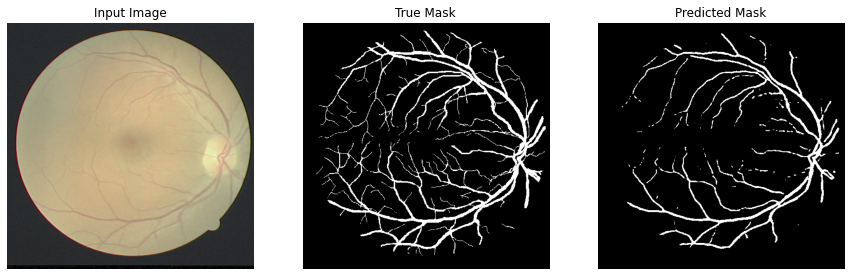


Sample Prediction after epoch 41

Epoch 42/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1760 - dice_coefficient: 0.4632 - accuracy: 0.9614 - val_loss: 0.1831 - val_dice_coefficient: 0.4067 - val_accuracy: 0.9568

Epoch 00042: val_loss improved from 0.18467 to 0.18310, saving model to /kaggle/Models/model9.h5
Epoch 43/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1725 - dice_coefficient: 0.4689 - accuracy: 0.9617 - val_loss: 0.1788 - val_dice_coefficient: 0.4106 - val_accuracy: 0.9560

Epoch 00043: val_loss improved from 0.18310 to 0.17877, saving model to /kaggle/Models/model9.h5
Epoch 44/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1693 - dice_coefficient: 0.4749 - accuracy: 0.9620 - val_loss: 0.1741 - val_dice_coefficient: 0.4421 - val_accuracy: 0.9592

Epoch 00044: val_loss improved from 0.17877 to 0.17408, saving model to /kaggle/Models/model9.h5
Epoch 45/250
12/12 [==============================] - 7s 561ms/st

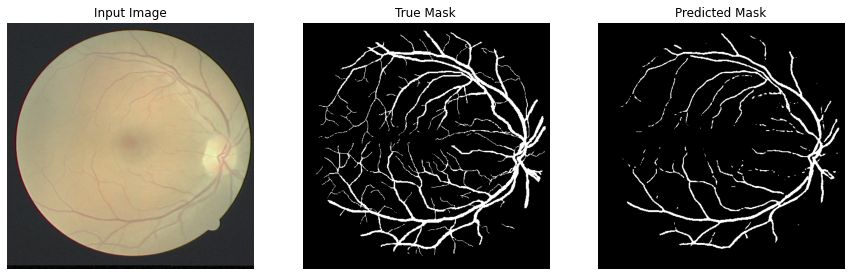


Sample Prediction after epoch 46

Epoch 47/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1601 - dice_coefficient: 0.4911 - accuracy: 0.9628 - val_loss: 0.1706 - val_dice_coefficient: 0.4173 - val_accuracy: 0.9537

Epoch 00047: val_loss did not improve from 0.16973
Epoch 48/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1575 - dice_coefficient: 0.4963 - accuracy: 0.9630 - val_loss: 0.1653 - val_dice_coefficient: 0.4353 - val_accuracy: 0.9554

Epoch 00048: val_loss improved from 0.16973 to 0.16530, saving model to /kaggle/Models/model9.h5
Epoch 49/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1545 - dice_coefficient: 0.5017 - accuracy: 0.9633 - val_loss: 0.1607 - val_dice_coefficient: 0.4472 - val_accuracy: 0.9563

Epoch 00049: val_loss improved from 0.16530 to 0.16073, saving model to /kaggle/Models/model9.h5
Epoch 50/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1514 - dice_coefficient: 0.5083 -

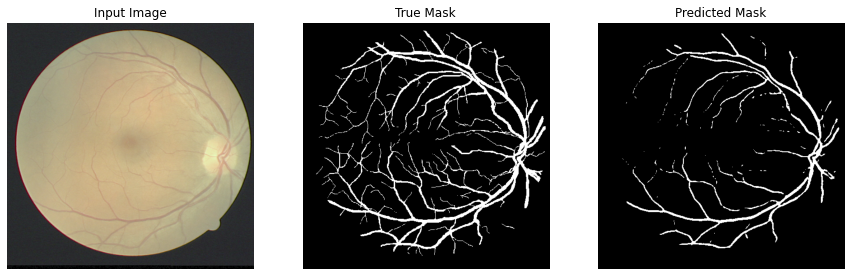


Sample Prediction after epoch 51

Epoch 52/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1456 - dice_coefficient: 0.5200 - accuracy: 0.9642 - val_loss: 0.1554 - val_dice_coefficient: 0.4627 - val_accuracy: 0.9570

Epoch 00052: val_loss improved from 0.16073 to 0.15538, saving model to /kaggle/Models/model9.h5
Epoch 53/250
12/12 [==============================] - 7s 559ms/step - loss: 0.1428 - dice_coefficient: 0.5261 - accuracy: 0.9644 - val_loss: 0.1568 - val_dice_coefficient: 0.4525 - val_accuracy: 0.9545

Epoch 00053: val_loss did not improve from 0.15538
Epoch 54/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1400 - dice_coefficient: 0.5324 - accuracy: 0.9647 - val_loss: 0.1584 - val_dice_coefficient: 0.4453 - val_accuracy: 0.9522

Epoch 00054: val_loss did not improve from 0.15538
Epoch 55/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1374 - dice_coefficient: 0.5383 - accuracy: 0.9650 - val_loss: 0.1527 - val_dic

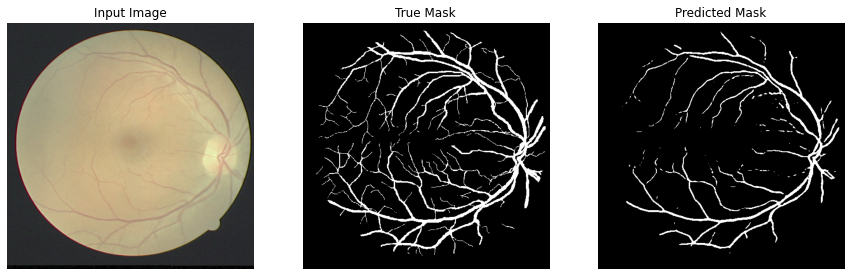


Sample Prediction after epoch 56

Epoch 57/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1330 - dice_coefficient: 0.5482 - accuracy: 0.9654 - val_loss: 0.1486 - val_dice_coefficient: 0.4762 - val_accuracy: 0.9541

Epoch 00057: val_loss improved from 0.15078 to 0.14863, saving model to /kaggle/Models/model9.h5
Epoch 58/250
12/12 [==============================] - 7s 562ms/step - loss: 0.1306 - dice_coefficient: 0.5536 - accuracy: 0.9657 - val_loss: 0.1496 - val_dice_coefficient: 0.4702 - val_accuracy: 0.9532

Epoch 00058: val_loss did not improve from 0.14863
Epoch 59/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1284 - dice_coefficient: 0.5596 - accuracy: 0.9661 - val_loss: 0.1443 - val_dice_coefficient: 0.4943 - val_accuracy: 0.9559

Epoch 00059: val_loss improved from 0.14863 to 0.14434, saving model to /kaggle/Models/model9.h5
Epoch 60/250
12/12 [==============================] - 7s 558ms/step - loss: 0.1263 - dice_coefficient: 0.5644 -

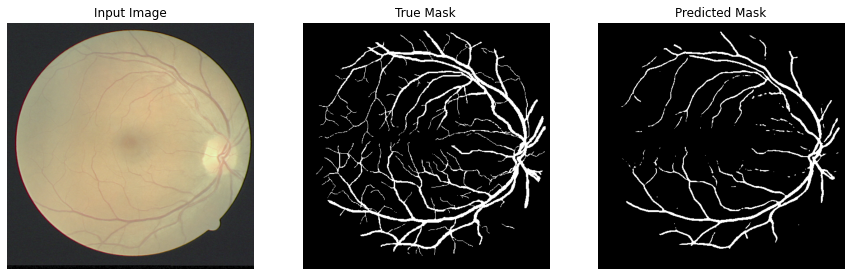


Sample Prediction after epoch 61

Epoch 62/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1223 - dice_coefficient: 0.5741 - accuracy: 0.9670 - val_loss: 0.1372 - val_dice_coefficient: 0.5270 - val_accuracy: 0.9587

Epoch 00062: val_loss improved from 0.13786 to 0.13721, saving model to /kaggle/Models/model9.h5
Epoch 63/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1205 - dice_coefficient: 0.5787 - accuracy: 0.9672 - val_loss: 0.1361 - val_dice_coefficient: 0.5247 - val_accuracy: 0.9584

Epoch 00063: val_loss improved from 0.13721 to 0.13611, saving model to /kaggle/Models/model9.h5
Epoch 64/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1188 - dice_coefficient: 0.5832 - accuracy: 0.9675 - val_loss: 0.1336 - val_dice_coefficient: 0.5370 - val_accuracy: 0.9597

Epoch 00064: val_loss improved from 0.13611 to 0.13362, saving model to /kaggle/Models/model9.h5
Epoch 65/250
12/12 [==============================] - 7s 562ms/st

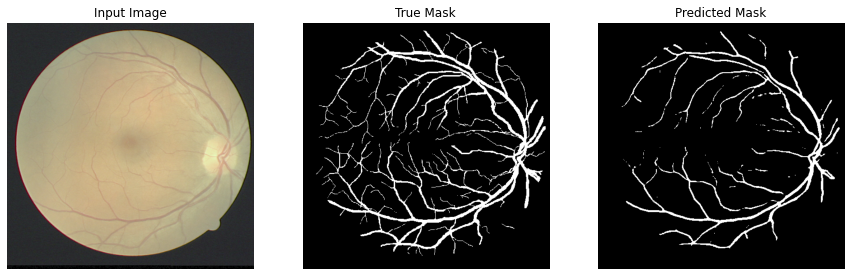


Sample Prediction after epoch 66

Epoch 67/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1143 - dice_coefficient: 0.5949 - accuracy: 0.9680 - val_loss: 0.1313 - val_dice_coefficient: 0.5530 - val_accuracy: 0.9596

Epoch 00067: val_loss improved from 0.13362 to 0.13125, saving model to /kaggle/Models/model9.h5
Epoch 68/250
12/12 [==============================] - 7s 559ms/step - loss: 0.1126 - dice_coefficient: 0.5995 - accuracy: 0.9683 - val_loss: 0.1307 - val_dice_coefficient: 0.5501 - val_accuracy: 0.9597

Epoch 00068: val_loss improved from 0.13125 to 0.13066, saving model to /kaggle/Models/model9.h5
Epoch 69/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1112 - dice_coefficient: 0.6038 - accuracy: 0.9685 - val_loss: 0.1295 - val_dice_coefficient: 0.5465 - val_accuracy: 0.9601

Epoch 00069: val_loss improved from 0.13066 to 0.12953, saving model to /kaggle/Models/model9.h5
Epoch 70/250
12/12 [==============================] - 7s 559ms/st

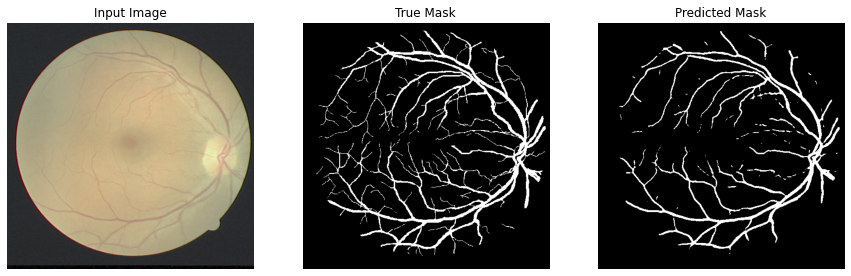


Sample Prediction after epoch 71

Epoch 72/250
12/12 [==============================] - 7s 560ms/step - loss: 0.1070 - dice_coefficient: 0.6159 - accuracy: 0.9691 - val_loss: 0.1252 - val_dice_coefficient: 0.5722 - val_accuracy: 0.9609

Epoch 00072: val_loss improved from 0.12569 to 0.12523, saving model to /kaggle/Models/model9.h5
Epoch 73/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1056 - dice_coefficient: 0.6194 - accuracy: 0.9694 - val_loss: 0.1241 - val_dice_coefficient: 0.5747 - val_accuracy: 0.9607

Epoch 00073: val_loss improved from 0.12523 to 0.12414, saving model to /kaggle/Models/model9.h5
Epoch 74/250
12/12 [==============================] - 7s 559ms/step - loss: 0.1043 - dice_coefficient: 0.6232 - accuracy: 0.9697 - val_loss: 0.1226 - val_dice_coefficient: 0.5807 - val_accuracy: 0.9615

Epoch 00074: val_loss improved from 0.12414 to 0.12257, saving model to /kaggle/Models/model9.h5
Epoch 75/250
12/12 [==============================] - 7s 561ms/st

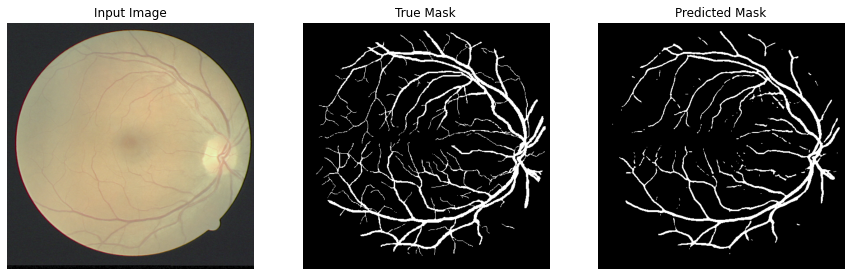


Sample Prediction after epoch 76

Epoch 77/250
12/12 [==============================] - 7s 561ms/step - loss: 0.1007 - dice_coefficient: 0.6341 - accuracy: 0.9702 - val_loss: 0.1215 - val_dice_coefficient: 0.5992 - val_accuracy: 0.9612

Epoch 00077: val_loss improved from 0.12257 to 0.12154, saving model to /kaggle/Models/model9.h5
Epoch 78/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0998 - dice_coefficient: 0.6366 - accuracy: 0.9703 - val_loss: 0.1192 - val_dice_coefficient: 0.5970 - val_accuracy: 0.9617

Epoch 00078: val_loss improved from 0.12154 to 0.11923, saving model to /kaggle/Models/model9.h5
Epoch 79/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0989 - dice_coefficient: 0.6406 - accuracy: 0.9703 - val_loss: 0.1201 - val_dice_coefficient: 0.5979 - val_accuracy: 0.9614

Epoch 00079: val_loss did not improve from 0.11923
Epoch 80/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0978 - dice_coefficient: 0.6430 -

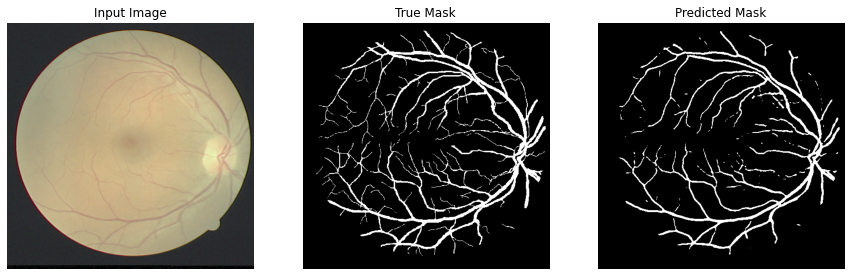


Sample Prediction after epoch 81

Epoch 82/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0956 - dice_coefficient: 0.6498 - accuracy: 0.9709 - val_loss: 0.1178 - val_dice_coefficient: 0.6053 - val_accuracy: 0.9617

Epoch 00082: val_loss did not improve from 0.11704
Epoch 83/250
12/12 [==============================] - 7s 563ms/step - loss: 0.0946 - dice_coefficient: 0.6530 - accuracy: 0.9712 - val_loss: 0.1208 - val_dice_coefficient: 0.6066 - val_accuracy: 0.9609

Epoch 00083: val_loss did not improve from 0.11704
Epoch 84/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0935 - dice_coefficient: 0.6567 - accuracy: 0.9714 - val_loss: 0.1168 - val_dice_coefficient: 0.6194 - val_accuracy: 0.9614

Epoch 00084: val_loss improved from 0.11704 to 0.11680, saving model to /kaggle/Models/model9.h5
Epoch 85/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0922 - dice_coefficient: 0.6603 - accuracy: 0.9717 - val_loss: 0.1169 - val_dic

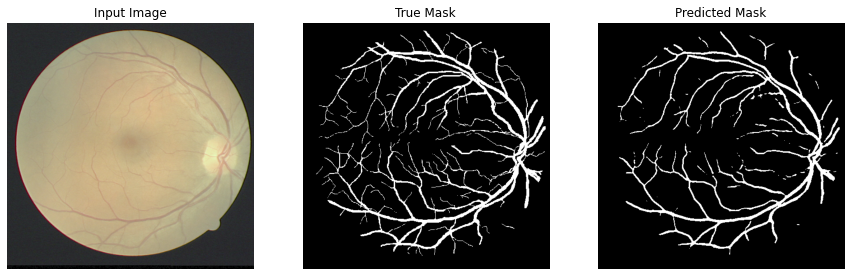


Sample Prediction after epoch 86

Epoch 87/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0902 - dice_coefficient: 0.6665 - accuracy: 0.9720 - val_loss: 0.1156 - val_dice_coefficient: 0.6336 - val_accuracy: 0.9620

Epoch 00087: val_loss improved from 0.11680 to 0.11560, saving model to /kaggle/Models/model9.h5
Epoch 88/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0895 - dice_coefficient: 0.6687 - accuracy: 0.9721 - val_loss: 0.1147 - val_dice_coefficient: 0.6320 - val_accuracy: 0.9621

Epoch 00088: val_loss improved from 0.11560 to 0.11468, saving model to /kaggle/Models/model9.h5
Epoch 89/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0885 - dice_coefficient: 0.6719 - accuracy: 0.9724 - val_loss: 0.1130 - val_dice_coefficient: 0.6341 - val_accuracy: 0.9624

Epoch 00089: val_loss improved from 0.11468 to 0.11296, saving model to /kaggle/Models/model9.h5
Epoch 90/250
12/12 [==============================] - 7s 562ms/st

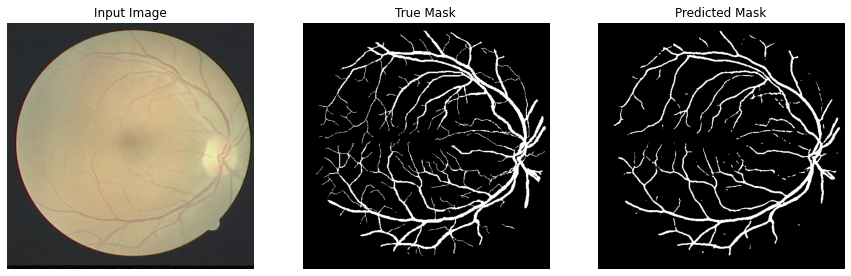


Sample Prediction after epoch 91

Epoch 92/250
12/12 [==============================] - 7s 559ms/step - loss: 0.0861 - dice_coefficient: 0.6806 - accuracy: 0.9727 - val_loss: 0.1129 - val_dice_coefficient: 0.6187 - val_accuracy: 0.9622

Epoch 00092: val_loss improved from 0.11296 to 0.11287, saving model to /kaggle/Models/model9.h5
Epoch 93/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0858 - dice_coefficient: 0.6824 - accuracy: 0.9726 - val_loss: 0.1121 - val_dice_coefficient: 0.6333 - val_accuracy: 0.9623

Epoch 00093: val_loss improved from 0.11287 to 0.11213, saving model to /kaggle/Models/model9.h5
Epoch 94/250
12/12 [==============================] - 7s 565ms/step - loss: 0.0848 - dice_coefficient: 0.6850 - accuracy: 0.9728 - val_loss: 0.1159 - val_dice_coefficient: 0.6442 - val_accuracy: 0.9616

Epoch 00094: val_loss did not improve from 0.11213
Epoch 95/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0841 - dice_coefficient: 0.6872 -

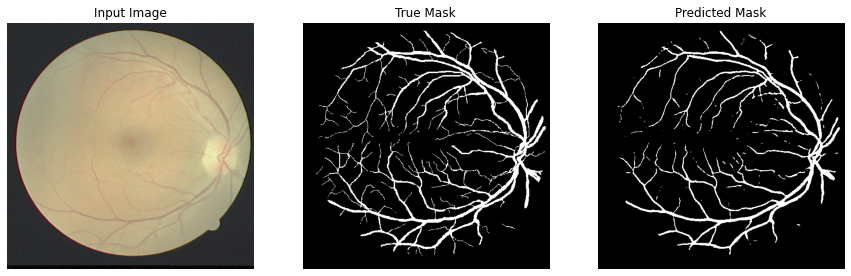


Sample Prediction after epoch 96

Epoch 97/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0830 - dice_coefficient: 0.6917 - accuracy: 0.9731 - val_loss: 0.1129 - val_dice_coefficient: 0.6475 - val_accuracy: 0.9623

Epoch 00097: val_loss did not improve from 0.11063
Epoch 98/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0820 - dice_coefficient: 0.6947 - accuracy: 0.9734 - val_loss: 0.1111 - val_dice_coefficient: 0.6434 - val_accuracy: 0.9624

Epoch 00098: val_loss did not improve from 0.11063
Epoch 99/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0804 - dice_coefficient: 0.6983 - accuracy: 0.9740 - val_loss: 0.1109 - val_dice_coefficient: 0.6552 - val_accuracy: 0.9626

Epoch 00099: val_loss did not improve from 0.11063
Epoch 100/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0796 - dice_coefficient: 0.7012 - accuracy: 0.9743 - val_loss: 0.1122 - val_dice_coefficient: 0.6553 - val_accuracy: 0.9621


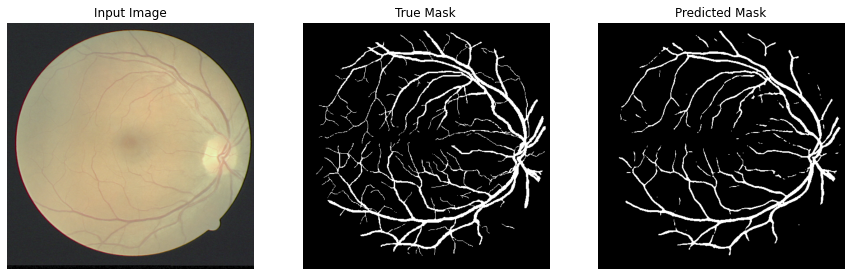


Sample Prediction after epoch 101

Epoch 102/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0784 - dice_coefficient: 0.7059 - accuracy: 0.9744 - val_loss: 0.1099 - val_dice_coefficient: 0.6567 - val_accuracy: 0.9625

Epoch 00102: val_loss improved from 0.11063 to 0.10985, saving model to /kaggle/Models/model9.h5
Epoch 103/250
12/12 [==============================] - 7s 560ms/step - loss: 0.0772 - dice_coefficient: 0.7092 - accuracy: 0.9748 - val_loss: 0.1105 - val_dice_coefficient: 0.6511 - val_accuracy: 0.9623

Epoch 00103: val_loss did not improve from 0.10985
Epoch 104/250
12/12 [==============================] - 7s 563ms/step - loss: 0.0765 - dice_coefficient: 0.7119 - accuracy: 0.9749 - val_loss: 0.1116 - val_dice_coefficient: 0.6452 - val_accuracy: 0.9619

Epoch 00104: val_loss did not improve from 0.10985
Epoch 105/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0760 - dice_coefficient: 0.7138 - accuracy: 0.9750 - val_loss: 0.1145 - va

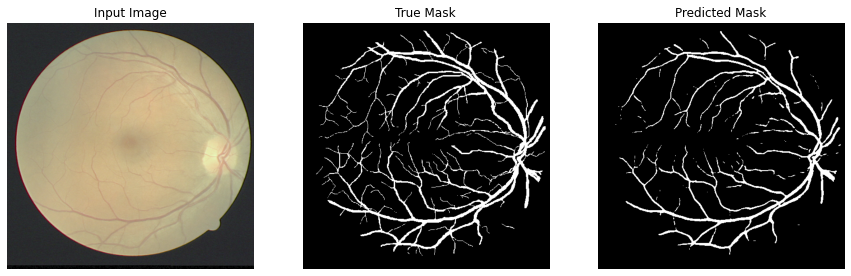


Sample Prediction after epoch 106

Epoch 107/250
12/12 [==============================] - 7s 559ms/step - loss: 0.0756 - dice_coefficient: 0.7162 - accuracy: 0.9749 - val_loss: 0.1119 - val_dice_coefficient: 0.6517 - val_accuracy: 0.9616

Epoch 00107: val_loss did not improve from 0.10985
Epoch 108/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0752 - dice_coefficient: 0.7179 - accuracy: 0.9749 - val_loss: 0.1126 - val_dice_coefficient: 0.6500 - val_accuracy: 0.9615

Epoch 00108: val_loss did not improve from 0.10985
Epoch 109/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0747 - dice_coefficient: 0.7205 - accuracy: 0.9749 - val_loss: 0.1136 - val_dice_coefficient: 0.6503 - val_accuracy: 0.9610

Epoch 00109: val_loss did not improve from 0.10985
Epoch 110/250
12/12 [==============================] - 7s 562ms/step - loss: 0.0746 - dice_coefficient: 0.7220 - accuracy: 0.9748 - val_loss: 0.1101 - val_dice_coefficient: 0.6606 - val_accuracy: 0.9

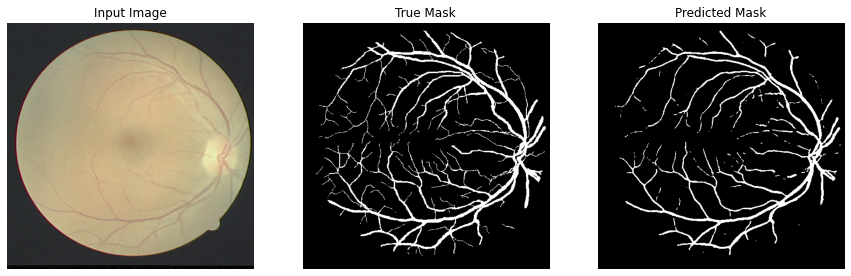


Sample Prediction after epoch 111

Epoch 112/250
12/12 [==============================] - 7s 561ms/step - loss: 0.0738 - dice_coefficient: 0.7240 - accuracy: 0.9749 - val_loss: 0.1105 - val_dice_coefficient: 0.6605 - val_accuracy: 0.9620

Epoch 00112: val_loss did not improve from 0.10985
Epoch 00112: early stopping


In [290]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)


# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model9.compile(optim, bce, metrics)



history = model9.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [291]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [292]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [293]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [260]:
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [294]:
valid_dataset = test_dataset

In [295]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [297]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model9.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [298]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [299]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.86      0.70      0.77    458225

    accuracy                           0.96   5242880
   macro avg       0.91      0.84      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [300]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6269730960087142


In [301]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7707233728041389


In [302]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7555671051990432


In [303]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8448104199335631


(-0.5, 511.5, 511.5, -0.5)

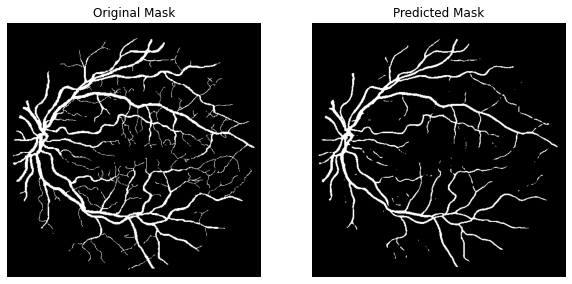

In [304]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

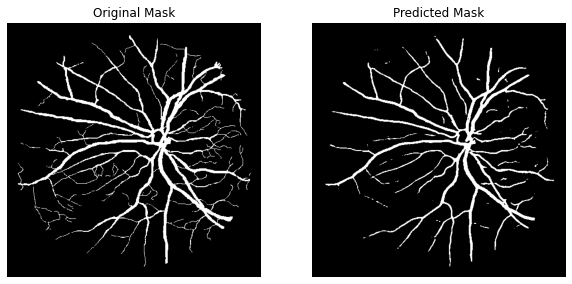

In [305]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

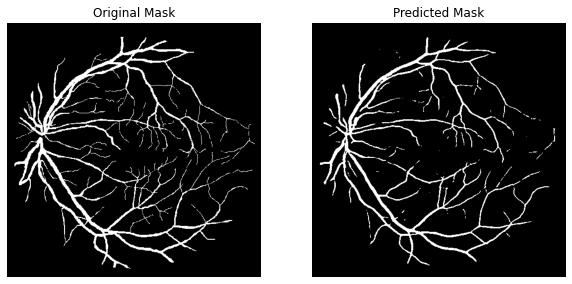

In [306]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

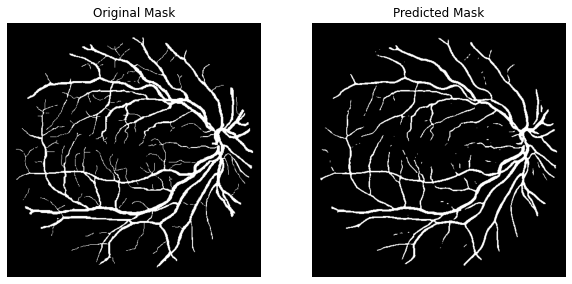

In [307]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model9.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')